In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import timeit.
import timeit
from citipy import citipy

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


Beginning Data Retrieval     
-----------------------------


In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | rio gallegos
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | soyo
Processing Record 5 of Set 1 | mormugao
Processing Record 6 of Set 1 | mudon
Processing Record 7 of Set 1 | hokitika
Processing Record 8 of Set 1 | tombouctou
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | concarneau
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | ossora
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | jerome
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | mattru
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | puerto ayora
Process

Processing Record 42 of Set 4 | ponta delgada
Processing Record 43 of Set 4 | siuna
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | komsomolskiy
Processing Record 48 of Set 4 | tukrah
Processing Record 49 of Set 4 | mehamn
Processing Record 50 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 5 | puri
Processing Record 2 of Set 5 | tashtagol
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | paita
Processing Record 5 of Set 5 | lachute
Processing Record 6 of Set 5 | flin flon
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | san cristobal
Processing Record 11 of Set 5 | fleet
Processing Record 12 of Set 5 | yar-sale
Processing Record 13 of Set 5 | chokurdakh
Processing Record 14 of Set 5 | lavrentiya
Processing

Processing Record 30 of Set 8 | esna
Processing Record 31 of Set 8 | bowen
Processing Record 32 of Set 8 | henties bay
Processing Record 33 of Set 8 | awjilah
Processing Record 34 of Set 8 | igarka
Processing Record 35 of Set 8 | evensk
Processing Record 36 of Set 8 | hayvoron
Processing Record 37 of Set 8 | providencia
Processing Record 38 of Set 8 | kuche
City not found. Skipping...
Processing Record 39 of Set 8 | davidson
Processing Record 40 of Set 8 | prachuap khiri khan
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | port hedland
Processing Record 43 of Set 8 | vagay
Processing Record 44 of Set 8 | krasnoselkup
Processing Record 45 of Set 8 | sandanski
Processing Record 46 of Set 8 | erenhot
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | belmonte
Processing Record 50 of Set 8 | peniche
Processing Record 1 of Set 9 | lolua
City not found. Skipping...
Processing Record 2 of Set 9

Processing Record 24 of Set 12 | woodward
Processing Record 25 of Set 12 | yaan
Processing Record 26 of Set 12 | esil
Processing Record 27 of Set 12 | estacion coahuila
Processing Record 28 of Set 12 | chama
Processing Record 29 of Set 12 | iisaku
Processing Record 30 of Set 12 | canavieiras
Processing Record 31 of Set 12 | pangai
Processing Record 32 of Set 12 | samarai
Processing Record 33 of Set 12 | ambilobe
Processing Record 34 of Set 12 | ostersund
Processing Record 35 of Set 12 | pundaguitan
Processing Record 36 of Set 12 | khani
Processing Record 37 of Set 12 | luderitz
Processing Record 38 of Set 12 | tampere
Processing Record 39 of Set 12 | arlit
Processing Record 40 of Set 12 | puerto del rosario
Processing Record 41 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 42 of Set 12 | grindavik
Processing Record 43 of Set 12 | kirkuk
Processing Record 44 of Set 12 | broken hill
Processing Record 45 of Set 12 | poya
Processing Record 46 of Set 12 | fengrun
Process

In [27]:
len(city_data)

568

In [28]:
city_data_df = pd.DataFrame(city_data)

In [29]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,82.56,78,40,10.36,TO,2022-09-22 01:25:41
1,Rio Gallegos,-51.6226,-69.2181,46.45,76,40,29.93,AR,2022-09-22 01:21:36
2,Punta Arenas,-53.1500,-70.9167,48.31,71,75,8.05,CL,2022-09-22 01:25:41
3,Soyo,-6.1349,12.3689,73.38,87,100,6.73,AO,2022-09-22 01:25:41
4,Mormugao,15.4000,73.8000,74.46,88,40,2.30,IN,2022-09-22 01:25:42
...,...,...,...,...,...,...,...,...,...
563,Swan River,52.1058,-101.2676,46.29,71,79,3.44,CA,2022-09-22 01:40:43
564,Muana,-1.5283,-49.2167,77.70,82,53,8.14,BR,2022-09-22 01:40:43
565,Kashi,39.4547,75.9797,61.81,59,40,15.66,CN,2022-09-22 01:40:44
566,Gari,59.4307,62.3497,44.02,95,37,5.23,RU,2022-09-22 01:40:44


In [32]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 
                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [33]:
city_data_df_1 = city_data_df[new_column_order]

In [34]:
city_data_df_1

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-09-22 01:25:41,-21.2000,-175.2000,82.56,78,40,10.36
1,Rio Gallegos,AR,2022-09-22 01:21:36,-51.6226,-69.2181,46.45,76,40,29.93
2,Punta Arenas,CL,2022-09-22 01:25:41,-53.1500,-70.9167,48.31,71,75,8.05
3,Soyo,AO,2022-09-22 01:25:41,-6.1349,12.3689,73.38,87,100,6.73
4,Mormugao,IN,2022-09-22 01:25:42,15.4000,73.8000,74.46,88,40,2.30
...,...,...,...,...,...,...,...,...,...
563,Swan River,CA,2022-09-22 01:40:43,52.1058,-101.2676,46.29,71,79,3.44
564,Muana,BR,2022-09-22 01:40:43,-1.5283,-49.2167,77.70,82,53,8.14
565,Kashi,CN,2022-09-22 01:40:44,39.4547,75.9797,61.81,59,40,15.66
566,Gari,RU,2022-09-22 01:40:44,59.4307,62.3497,44.02,95,37,5.23


In [39]:
# Create the output file (CSV).
output_data_file = r'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df_1.to_csv(output_data_file, index_label="City_ID")

# module 6.3.1

In [9]:
city_data_df = pd.read_csv(r'weather_data/cities.csv')

In [12]:
city_data_df.drop(columns='City_ID', inplace=True)

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1663812551.0130005

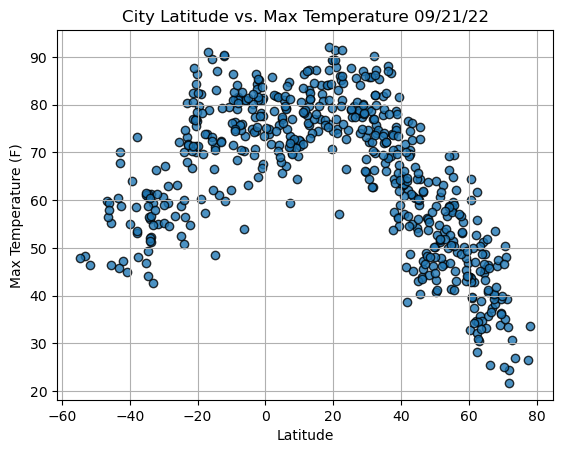

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

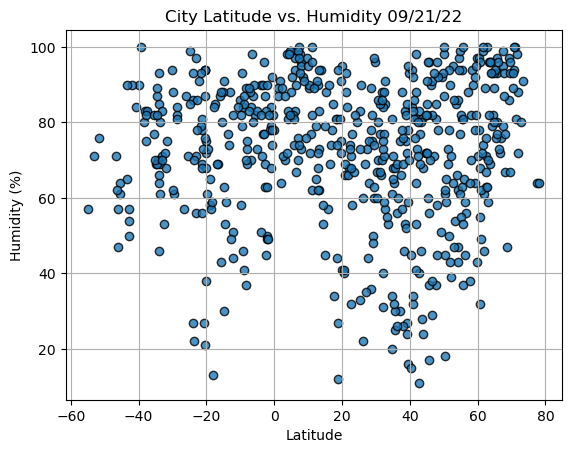

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

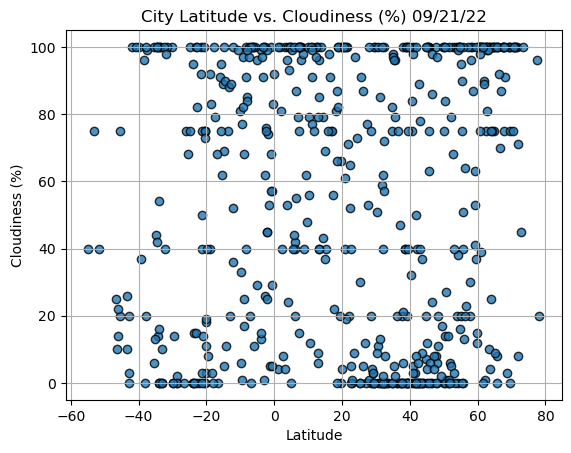

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

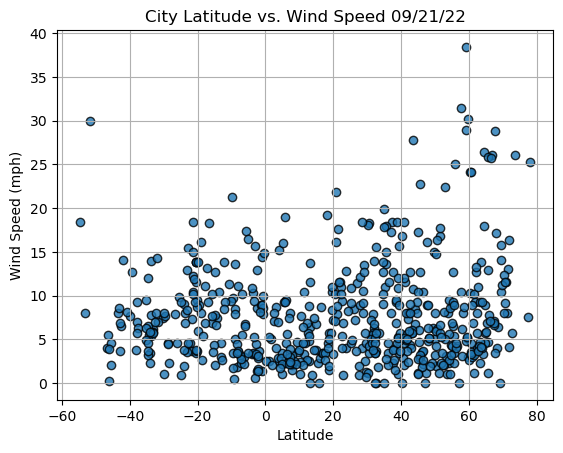

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

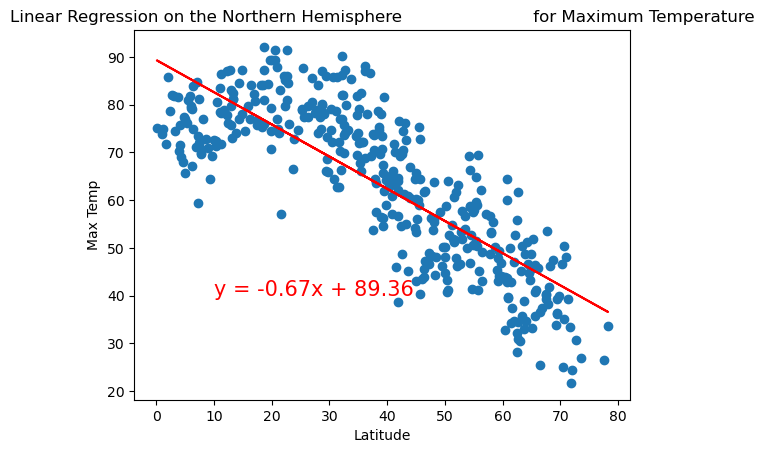

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

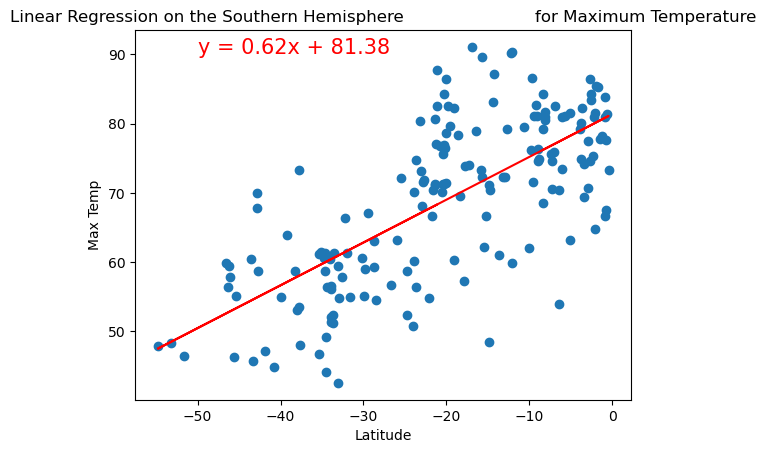

In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

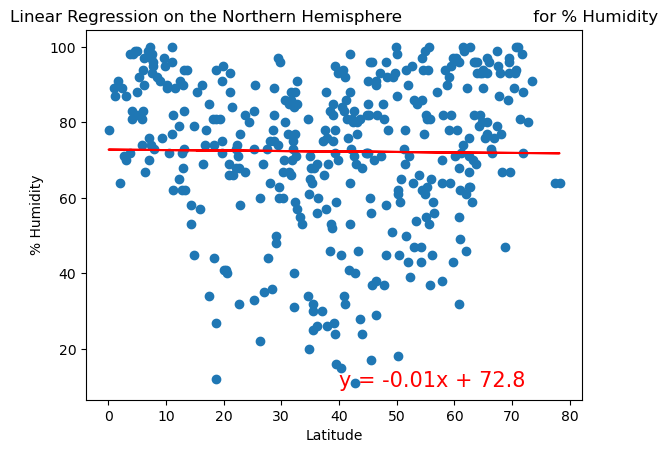

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

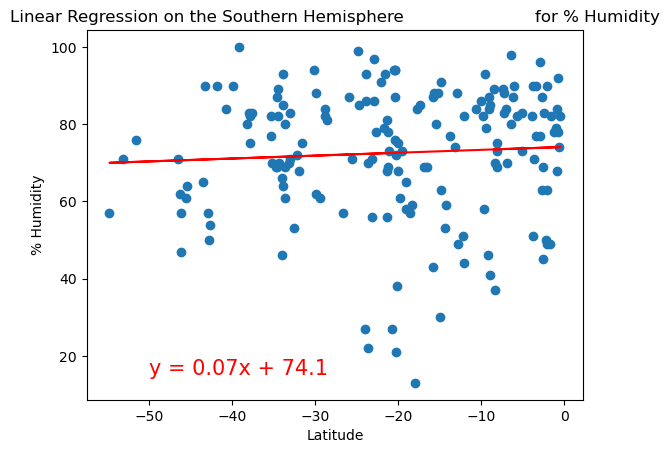

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

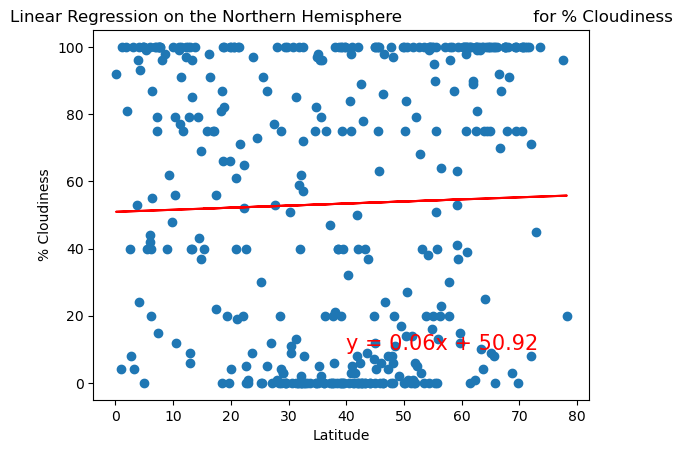

In [35]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

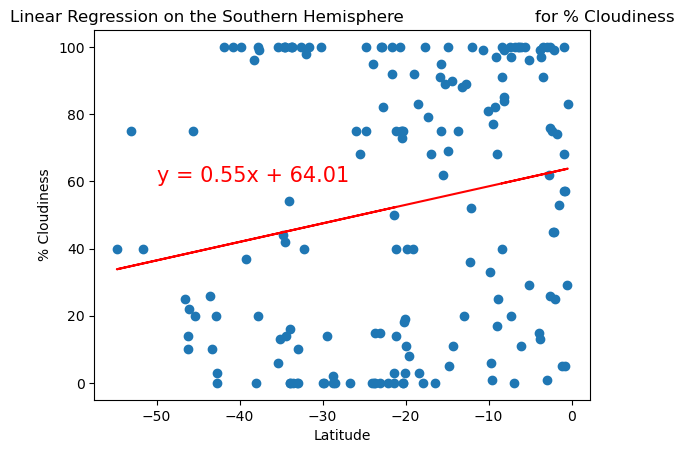

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))